In [128]:
import gzip
import numpy as np

f = gzip.open('datasets/mnist/train-images-idx3-ubyte.gz','r')
f.read(16)
buf = f.read(28 * 28 * 60000)
X_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X_train = X_train.reshape(60000, 28 * 28)
X_train.shape

(60000, 784)

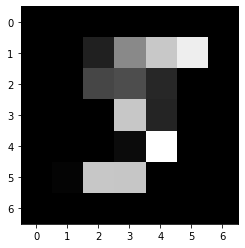

In [132]:
#!pip import opencv-python
import cv2

img = X_train[0].reshape(28, 28, 1)
resized = cv2.resize(img, (7, 7))
plt.imshow(resized, cmap=plt.get_cmap('gray'))

In [131]:
print(resized)

[[  0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.    32.5  135.5  197.25 234.75   0.  ]
 [  0.     0.    69.5   76.5   38.5    0.     0.  ]
 [  0.     0.     0.   196.75  36.25   0.     0.  ]
 [  0.     0.     0.    11.5  252.     0.     0.  ]
 [  0.     4.5  196.25 195.25   0.5    0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.  ]]


High median = 3146, index = 407


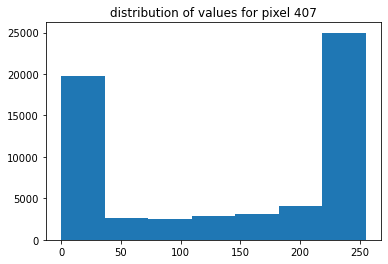

In [126]:
from matplotlib import pyplot as plt 
import numpy as np  

high_med = -1
high_i = -1
for i in range(0,X_train.shape[1]):
    arr = np.histogram(X_train[:,i], bins = np.linspace(0, 255, 8))
    med = np.median(arr[0])
    if med > high_med:
        high_med = med
        high_i = i

print('High median = %i, index = %i' % (high_med, high_i))
plt.hist(X_train[:,high_i], bins = np.linspace(0, 255, 8)) 
plt.title("distribution of values for pixel 407") 
plt.show()

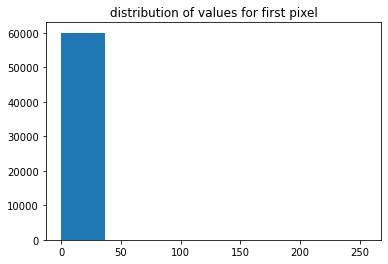

In [125]:
plt.hist(X_train[:,0], bins = np.linspace(0, 255, 8)) 
plt.title("distribution of values for first pixel") 
plt.show()

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()
clf_mnb = mnb.fit(X_train_resized, y_train)
y_pred = clf_mnb.predict(X_test_resized)
print('AUC: %0.5f' % accuracy_score(y_test, y_pred))

AUC: 0.77010
